# Одномерная линейная регрессия

In [1]:
import numpy
import matplotlib
import copy
from matplotlib import pyplot 

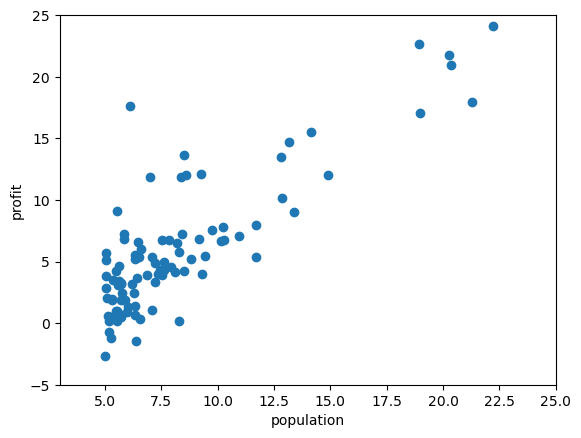

32.07273387745567


In [33]:
def get_new_lists(exported_data, x1, Y, x2): # x1 - список аргументов для построения графика
    # x2 - список вида (1 ... Xn
    #                   :      :
    #                   1 ... Xnm)
    # Y - список зависимых переменных
    received_data = exported_data.readlines() #читает файловый объект file построчно
    new_data = [] #будущий список из строк вида (население:прибыль)
    for str in received_data:
        new_data.append(str.split(",")) #разбиваем строку по запятой
    for str in new_data:
        x1.append(float(str[0]))
        x2.append(1) #добавляем единичку в список на первую позицию
        for i in range(len(str)):
            if (i == (len(str)-1)):
                 Y.append(float(str[i]))
            else:
                x2.append(float(str[i]))

def graph_output(X, Y):
    pyplot.axis([3, 25, -5, 25])
    pyplot.scatter(X, Y)
    pyplot.xlabel("population")
    pyplot.ylabel("profit")
    pyplot.show()

def computeCost(X, Y, theta):
    value = ((numpy.matmul(X, theta)-Y).transpose())@(numpy.matmul(X, theta)-Y)/(2*len(Y))
    return value[0][0]

data = open('C:\\Users\\idgar\\Desktop\\ML\\ex1data1.txt', 'r')

data_population = [] # список для хранения данных, предназначенных для построения графика (координата X)
data_profit = [] # координата Y
data_population_Matrix = []

get_new_lists(data, data_population, data_profit, data_population_Matrix)
graph_output(data_population, data_profit)
X = numpy.reshape(numpy.array(data_population_Matrix), (97, 2))
theta = numpy.reshape([0, 0], (2, 1))
Y = numpy.reshape(numpy.array(data_profit), (97, 1))
print(computeCost(X, Y, theta))

In [24]:
def gradientDescent(X, Y, theta, alpha, iters, list_of_results):
    #function_values = []
    theta_old = copy.deepcopy(theta)
    theta_new = copy.deepcopy(theta)
    for i in range(iters):
        theta_old = copy.deepcopy(theta_new)
        list_of_results.append(computeCost(X, Y, theta_old))
        theta_new = theta_old - (alpha/(len(Y))*(X.transpose())@(X@theta_old-Y))  
    return theta_new
                                 
function_values = []
iters = 600
alpha = 0.0242
theta_new = gradientDescent(X, Y, theta, alpha, iters, function_values)
print(theta_new)

[[-3.60741776]
 [ 1.1623429 ]]


In [25]:
print(computeCost(X, Y, theta_new))

4.484671221325198


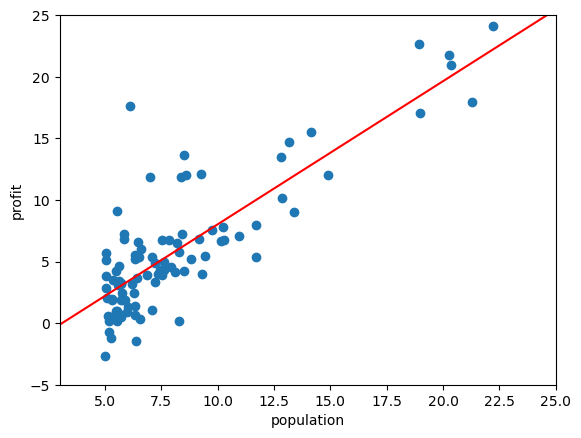

In [26]:
pyplot.axis([3, 25, -5, 25])
pyplot.scatter(data_population, data_profit)
pyplot.xlabel("population")
pyplot.ylabel("profit")
x = [1, 30]
y = [(theta_new[0] + theta_new[1]* x[0]), (theta_new[0] + theta_new[1]* x[1])]
pyplot.plot(x, y, 'r')
pyplot.show()

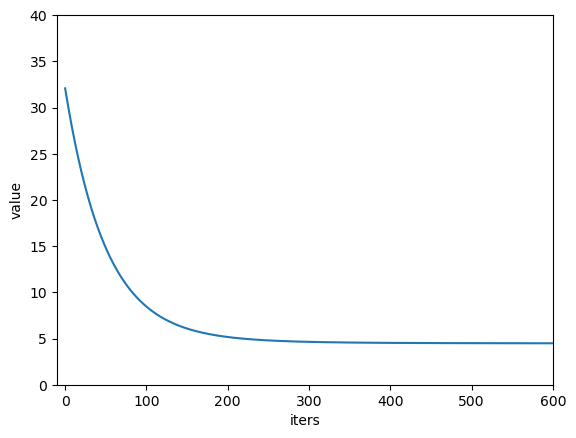

In [27]:
pyplot.axis([-10, iters, 0, 40])
iters_1 = list(range(0, iters))
#print(function_values)
#pyplot.figure(iters_1, function_values)
pyplot.plot(iters_1, function_values)
pyplot.xlabel("iters")
pyplot.ylabel("value")
pyplot.show()

# Множественная линейная регрессия

In [77]:
data1 = open('C:\\Users\\idgar\\Desktop\\ML\\1111.txt', 'r')

data_size = [] # список значений размеров
data_Y = [] # список цен
data_X_Matrix = [] #список аргументов

get_new_lists(data1, data_size, data_Y, data_X_Matrix)

X1 = numpy.reshape(numpy.array(data_X_Matrix), (len(data_Y), 3))
theta_2 = numpy.reshape([0, 0, 0], (3, 1))
Y1 = numpy.reshape(numpy.array(data_Y), (len(data_Y), 1))

average = sum(data_size)/len(data_size) #среднее арифметическое
dispersion = 0
for value in data_size:
    dispersion += (value**(2))/len(data_size)
dispersion = dispersion - average**(2)
standart_deviation = dispersion**(0.5)
for i in range(len(X1)):
    X1[i][1] = (X1[i][1]-average)/standart_deviation
    
# нормализация значений цен
average1 = sum(data_Y)/len(data_Y) #среднее арифметическое
dispersion1 = 0
for value in data_Y:
    dispersion1 += (value**(2))/len(data_Y)
dispersion1 = dispersion1 - average1**(2)
for i in range(len(Y1)):
    Y1[i][0] = (Y1[i][0]-average1)/standart_deviation1

print(computeCost(X1, Y1, theta_2))

0.5


In [104]:
alpha1 = 0.05
iters1 = 1000
function_values1 = []
theta_new1 = gradientDescent(X1, Y1, theta_2, alpha1, iters1, function_values1)
print(computeCost(X1, Y1, theta_new1))

0.13359664118092868


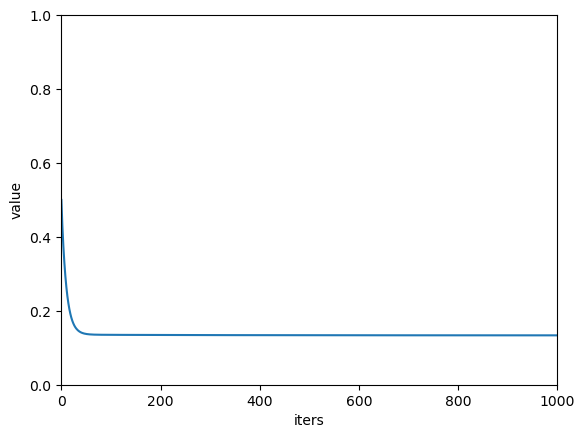

In [106]:
pyplot.axis([0, iters1, 0, 1])
iters_2 = list(range(0, iters1))
#print(function_values)
#pyplot.figure(iters_1, function_values)
pyplot.plot(iters_2, function_values1)
pyplot.xlabel("iters")
pyplot.ylabel("value")
pyplot.show()

In [137]:
from sklearn import linear_model
model = linear_model.LinearRegression()
x_1 = numpy.reshape(data_population, (len(data_population), 1))
model.fit(x_1, data_profit)
f = model.predict(x_1)
print(f)

[ 3.39377399  2.6989512   6.26719552  4.45927234  3.09515767  6.10530086
  5.02381586  6.33818102  3.84247394  2.13452698  2.91727635 13.00234766
  2.94507404  6.13572322  2.833764    2.52202431  3.69835548  2.22460102
  3.77494824  4.53992141  3.48802365 20.28701109  2.65409313  3.65146926
  2.74333205 18.70624151 11.40845471  9.17628876 11.82363042 22.59314512
  2.37050903  3.96559502  7.13763287  3.13333475  5.90033768  5.56903223
  5.7629002   2.79272364 11.41799898  3.68403908  2.55483273  4.31527318
 10.07225703  2.99243747  5.43934948  4.56652606  2.1531383   3.02548451
 10.06271276  2.71553436  5.09993141  2.43648379  4.96118159  5.17497322
  3.65946258  3.69060076  3.58955081  2.83257096  7.21160096  7.38268198
  6.63321825  2.28329828 21.49078204 13.88996469 18.72294398  4.71577457
  6.0005525   8.3161115   2.66518834 20.37171648  8.19680814  4.85452438
  3.2698178   4.72496093  2.10147995  3.91608412  5.09802255  2.11293307
  8.36144678  2.19787707  2.93934748  2.29415488  3

In [133]:
print(model.intercept_ , model.coef_ , model.score (x_1, data_profit))

-3.8957808783118537 [1.19303364] 0.7020315537841397


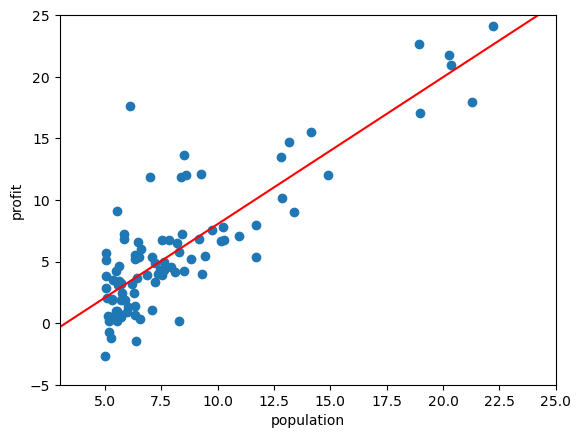

In [134]:
pyplot.axis([3, 25, -5, 25])
pyplot.scatter(data_population, data_profit)
pyplot.xlabel("population")
pyplot.ylabel("profit")
x = [1, 30]
y = [(model.intercept_ + (model.coef_[0])* x[0]), (model.intercept_ + (model.coef_[0])* x[1])]
pyplot.plot(x, y, 'r')
pyplot.show()

In [144]:
th = numpy.reshape([model.intercept_, model.coef_[0]], (2, 1))
print(computeCost(X, Y, th))

4.476971375975178
